In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
target = pd.read_csv('Feeders - day_agg.csv')

In [4]:
target.dtypes

Unnamed: 0      int64
Substation     object
t_date         object
P             float64
dtype: object

In [5]:
features = pd.read_csv('weather.csv')

In [6]:
features.dtypes

Unnamed: 0        int64
Site             object
Date             object
TempOut         float64
HiTemp          float64
LowTemp         float64
OutHum          float64
DewPt           float64
WindSpeed       float64
WindDir         float64
WindRun         float64
HiSpeed         float64
HiDir           float64
WindChill       float64
HeatIndex       float64
THWIndex        float64
Bar             float64
Rain            float64
RainRate        float64
SolarRad        float64
SolarEnergy     float64
HiSolarRad      float64
HeatD-D         float64
CoolD-D         float64
InTemp          float64
InHum           float64
InDew           float64
InHeat          float64
InEMC           float64
InAirDensity    float64
ET              float64
WindSamp        float64
WindTx          float64
ISSRecept       float64
ArcInt          float64
dtype: object

In [7]:
features['Site'].unique()

array(['Easthill Road', 'Elm Crescent', 'Forest Road', 'Maple Drive East',
       'YMCA'], dtype=object)

In [8]:
target = target[target['Substation'].isin(features['Site'])]

In [9]:
target['Substation'].unique()

array(['Elm Crescent', 'Forest Road', 'Maple Drive East', 'YMCA'],
      dtype=object)

In [10]:
target.columns

Index(['Unnamed: 0', 'Substation', 't_date', 'P'], dtype='object')

In [11]:
target.drop('Unnamed: 0', axis=1, inplace=True) # wierd column - just drop it

In [12]:
features.drop('Unnamed: 0', axis=1, inplace=True)

In [13]:
df = features.merge(target, how='inner', left_on=['Site', 'Date'], right_on=['Substation', 't_date']) # merge by place and data

In [14]:
df.describe()

,TempOut,HiTemp,LowTemp,OutHum,DewPt,WindSpeed,WindDir,WindRun,HiSpeed,HiDir,...,InDew,InHeat,InEMC,InAirDensity,ET,WindSamp,WindTx,ISSRecept,ArcInt,P
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,...,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.0,601.000000
mean,15.650550,15.883410,15.426431,79.780606,11.864729,1.397766,8.052539,0.698883,5.437464,8.077936,...,9.907064,23.826657,7.907936,0.072890,0.039415,700.714454,1.259662,99.916592,30.0,0.109748
std,3.303854,3.341160,3.271510,8.922674,2.722203,1.215704,3.776584,0.607852,3.128331,3.422148,...,2.653743,5.278201,1.719994,0.001275,0.025760,3.496397,0.445714,0.212796,0.0,0.082856
min,6.722917,6.854167,6.647917,56.729167,4.633333,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.910417,11.539583,4.215208,0.069031,0.001500,684.770833,1.000000,98.818750,30.0,0.018743
25%,13.645833,13.889583,13.412500,72.979167,9.985417,0.437500,5.187500,0.218750,3.191489,5.395833,...,8.133333,20.339583,6.655833,0.072085,0.019375,701.937500,1.000000,100.000000,30.0,0.033252
50%,15.943750,16.183333,15.725000,80.354167,11.847917,1.145833,7.854167,0.572917,5.145833,8.083333,...,9.947917,23.585417,8.038125,0.073017,0.033542,702.166667,1.125000,100.000000,30.0,0.055755
75%,17.722917,17.964583,17.433333,86.562500,13.816667,2.020833,10.812500,1.010417,7.291667,10.562500,...,11.808333,27.010417,9.192708,0.073765,0.055217,702.250000,1.291667,100.000000,30.0,0.187426
max,24.297917,24.637500,23.929167,97.479167,18.350000,6.729167,16.000000,3.364583,18.625000,15.479167,...,16.891667,42.445833,11.970417,0.076208,0.119583,702.458333,3.687500,100.000000,30.0,0.305385


In [15]:
df['ArcInt'].unique() # ArcInt is one value

array([30.])

In [16]:
df.drop('ArcInt', inplace=True, axis=1)

In [17]:
df['Site'].unique()

array(['Elm Crescent', 'Forest Road', 'Maple Drive East', 'YMCA'],
      dtype=object)

In [18]:
df.sort_values(by='Date')

,Site,Date,TempOut,HiTemp,LowTemp,OutHum,DewPt,WindSpeed,WindDir,WindRun,...,InHeat,InEMC,InAirDensity,ET,WindSamp,WindTx,ISSRecept,Substation,t_date,P
0,Elm Crescent,2014-06-10,20.150000,20.495833,19.904167,62.645833,12.195833,1.937500,9.125000,0.968750,...,34.454167,4.845625,0.070546,0.103333,701.375000,1.416667,100.0,Elm Crescent,2014-06-10,0.020756
438,YMCA,2014-06-10,17.725000,18.035417,17.493750,68.020833,11.277083,1.187500,9.979167,0.593750,...,28.408333,6.691875,0.071806,0.098958,701.000000,1.229167,100.0,YMCA,2014-06-10,0.128797
161,Forest Road,2014-06-10,19.627083,19.981250,19.410417,62.770833,11.820833,2.562500,8.687500,1.281250,...,24.150000,8.178750,0.073112,0.093542,701.395833,1.375000,100.0,Forest Road,2014-06-10,0.026812
322,Maple Drive East,2014-06-10,17.070833,17.379167,16.829167,74.375000,12.193750,2.062500,11.729167,1.031250,...,23.950000,7.576250,0.073237,0.051458,701.708333,1.770833,100.0,Maple Drive East,2014-06-10,0.168177
1,Elm Crescent,2014-06-11,17.681250,17.964583,17.414583,64.187500,10.400000,1.562500,9.145833,0.781250,...,30.735417,4.638958,0.072069,0.087500,702.145833,1.250000,100.0,Elm Crescent,2014-06-11,0.020857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,Maple Drive East,2014-11-17,9.206250,9.320833,9.108333,94.916667,8.425000,0.166667,7.062500,0.083333,...,15.097917,9.670625,0.074285,0.003125,702.041667,1.354167,100.0,Maple Drive East,2014-11-17,0.280652
436,Maple Drive East,2014-11-18,10.518750,10.697917,10.360417,91.041667,9.102083,0.000000,3.208333,0.000000,...,16.481250,9.331875,0.074569,0.005417,702.250000,1.125000,100.0,Maple Drive East,2014-11-18,0.259822
599,YMCA,2014-11-18,9.012500,9.187500,8.837500,93.000000,7.916667,0.000000,3.666667,0.000000,...,16.218750,9.556667,0.074338,0.009167,701.875000,1.125000,100.0,YMCA,2014-11-18,0.221834
437,Maple Drive East,2014-11-19,9.083333,9.293750,8.885417,91.000000,7.681250,0.104167,2.041667,0.052083,...,14.802083,9.366875,0.075744,0.006667,702.333333,1.250000,100.0,Maple Drive East,2014-11-19,0.189687


Check for correlation - we assume on start that we don't want to have more than 90% corr in features.

In [19]:
df.corr()

/var/folders/f_/1f21rmxs29z6pyrpb6hklc900000gn/T/ipykernel_14674/1886530979.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,TempOut,HiTemp,LowTemp,OutHum,DewPt,WindSpeed,WindDir,WindRun,HiSpeed,HiDir,...,InHum,InDew,InHeat,InEMC,InAirDensity,ET,WindSamp,WindTx,ISSRecept,P
TempOut,1.000000,0.999777,0.999788,-0.536063,0.810266,-0.071236,-0.077328,-0.071236,-0.058274,-0.090897,...,-0.260976,0.826593,0.756682,-0.301223,-0.608789,0.661087,-0.078559,-0.045782,-0.065305,-0.218045
HiTemp,0.999777,1.000000,0.999237,-0.546556,0.802751,-0.072959,-0.080293,-0.072959,-0.059992,-0.093915,...,-0.266067,0.820992,0.757128,-0.306127,-0.607962,0.669603,-0.078951,-0.047285,-0.065824,-0.218734
LowTemp,0.999788,0.999237,1.000000,-0.524854,0.817834,-0.068118,-0.074354,-0.068118,-0.055166,-0.087688,...,-0.255768,0.832629,0.756241,-0.296198,-0.610408,0.651552,-0.077347,-0.044693,-0.063813,-0.217056
OutHum,-0.536063,-0.546556,-0.524854,1.000000,0.057224,-0.085572,0.083611,-0.085572,-0.114962,0.100027,...,0.450234,-0.037089,-0.404370,0.456236,0.216226,-0.846588,-0.038819,-0.010307,-0.040278,0.312250
DewPt,0.810266,0.802751,0.817834,0.057224,1.000000,-0.136824,-0.036754,-0.136824,-0.142595,-0.039325,...,0.005968,0.951492,0.609660,-0.037471,-0.558087,0.183886,-0.125151,-0.059542,-0.110296,-0.040339
WindSpeed,-0.071236,-0.072959,-0.068118,-0.085572,-0.136824,1.000000,0.441118,1.000000,0.951159,0.426869,...,-0.048263,-0.143883,-0.024170,-0.039862,-0.084230,0.135511,0.137576,0.122286,0.137647,-0.301590
WindDir,-0.077328,-0.080293,-0.074354,0.083611,-0.036754,0.441118,1.000000,0.441118,0.413413,0.967795,...,0.049177,-0.095549,-0.072622,0.054373,-0.023028,-0.026485,0.054619,-0.047679,0.093386,0.103260
WindRun,-0.071236,-0.072959,-0.068118,-0.085572,-0.136824,1.000000,0.441118,1.000000,0.951159,0.426869,...,-0.048263,-0.143883,-0.024170,-0.039862,-0.084230,0.135511,0.137576,0.122286,0.137647,-0.301590
HiSpeed,-0.058274,-0.059992,-0.055166,-0.114962,-0.142595,0.951159,0.413413,0.951159,1.000000,0.400385,...,-0.064620,-0.135506,-0.008617,-0.056456,-0.126166,0.174608,0.221964,0.157411,0.221077,-0.323696
HiDir,-0.090897,-0.093915,-0.087688,0.100027,-0.039325,0.426869,0.967795,0.426869,0.400385,1.000000,...,0.137669,-0.087159,-0.143603,0.142975,0.061299,-0.059856,0.060969,-0.043171,0.101582,0.129227


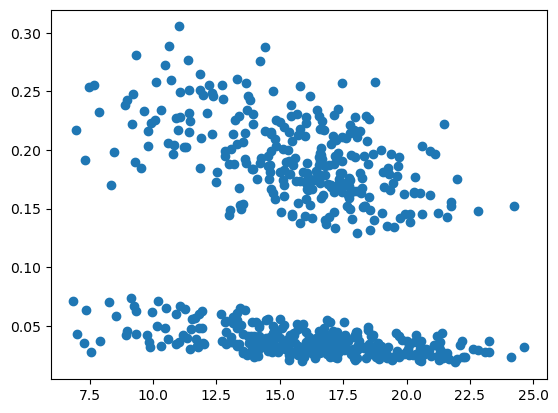

In [20]:
# TempOut, HiTemp, LowTemp, WindChill, HeatIndex, THWIndex, HeatD-D?

df_temp = df.sort_values(by='HiTemp')
plt.scatter(df['HiTemp'], df['P'])
plt.show()

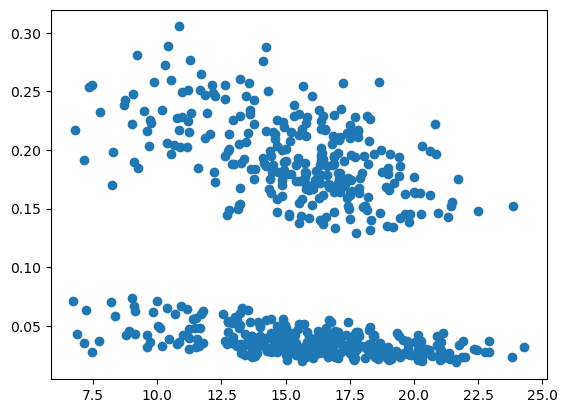

In [21]:
plt.scatter(df['TempOut'], df['P'])
plt.show()

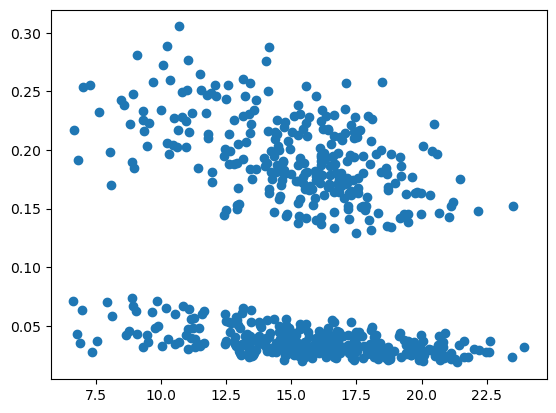

In [22]:
plt.scatter(df['LowTemp'], df['P'])
plt.show()

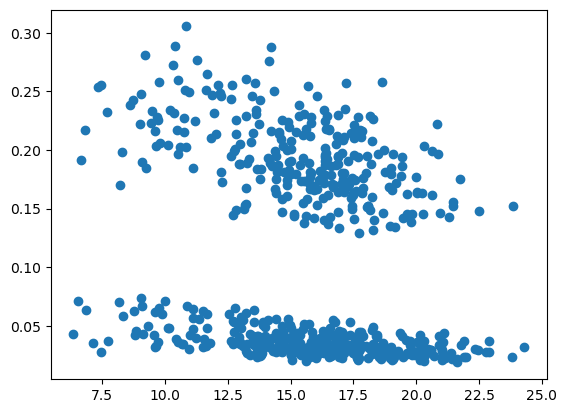

In [23]:
plt.scatter(df['WindChill'], df['P'])
plt.show()

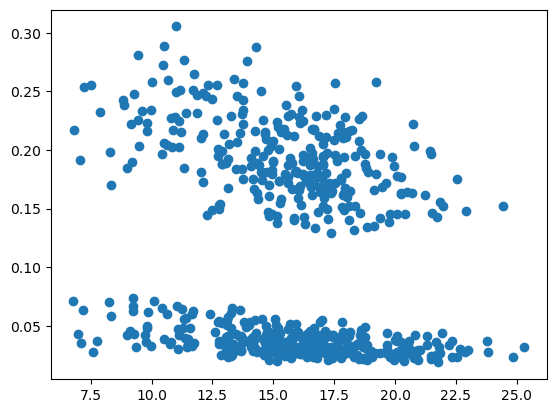

In [24]:
#HeatIndex, THWIndex, HeatD-D
plt.scatter(df['HeatIndex'], df['P'])
plt.show()

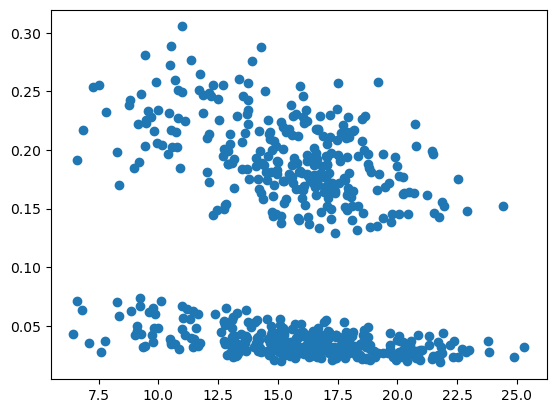

In [25]:
plt.scatter(df['THWIndex'], df['P'])
plt.show()

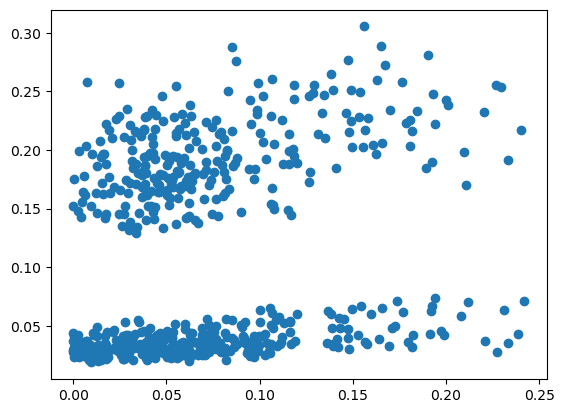

In [26]:
plt.scatter(df['HeatD-D'], df['P'])
plt.show()

Don't see this as perfect predictor. Maybe as additional feature in random forest would be good. Can leave only the most correlated variable

In [27]:
df.drop(['TempOut', 'LowTemp', 'WindChill', 'HeatIndex', 'THWIndex', 'HeatD-D'], axis=1, inplace=True)

In [28]:
df.corr()

/var/folders/f_/1f21rmxs29z6pyrpb6hklc900000gn/T/ipykernel_14674/1886530979.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,HiTemp,OutHum,DewPt,WindSpeed,WindDir,WindRun,HiSpeed,HiDir,Bar,Rain,...,InHum,InDew,InHeat,InEMC,InAirDensity,ET,WindSamp,WindTx,ISSRecept,P
HiTemp,1.000000,-0.546556,0.802751,-0.072959,-0.080293,-0.072959,-0.059992,-0.093915,0.406500,-0.056715,...,-0.266067,0.820992,0.757128,-0.306127,-0.607962,0.669603,-0.078951,-0.047285,-0.065824,-0.218734
OutHum,-0.546556,1.000000,0.057224,-0.085572,0.083611,-0.085572,-0.114962,0.100027,-0.412800,0.167071,...,0.450234,-0.037089,-0.404370,0.456236,0.216226,-0.846588,-0.038819,-0.010307,-0.040278,0.312250
DewPt,0.802751,0.057224,1.000000,-0.136824,-0.036754,-0.136824,-0.142595,-0.039325,0.208384,0.047584,...,0.005968,0.951492,0.609660,-0.037471,-0.558087,0.183886,-0.125151,-0.059542,-0.110296,-0.040339
WindSpeed,-0.072959,-0.085572,-0.136824,1.000000,0.441118,1.000000,0.951159,0.426869,-0.246004,0.101199,...,-0.048263,-0.143883,-0.024170,-0.039862,-0.084230,0.135511,0.137576,0.122286,0.137647,-0.301590
WindDir,-0.080293,0.083611,-0.036754,0.441118,1.000000,0.441118,0.413413,0.967795,-0.212301,0.022181,...,0.049177,-0.095549,-0.072622,0.054373,-0.023028,-0.026485,0.054619,-0.047679,0.093386,0.103260
WindRun,-0.072959,-0.085572,-0.136824,1.000000,0.441118,1.000000,0.951159,0.426869,-0.246004,0.101199,...,-0.048263,-0.143883,-0.024170,-0.039862,-0.084230,0.135511,0.137576,0.122286,0.137647,-0.301590
HiSpeed,-0.059992,-0.114962,-0.142595,0.951159,0.413413,0.951159,1.000000,0.400385,-0.299006,0.101572,...,-0.064620,-0.135506,-0.008617,-0.056456,-0.126166,0.174608,0.221964,0.157411,0.221077,-0.323696
HiDir,-0.093915,0.100027,-0.039325,0.426869,0.967795,0.426869,0.400385,1.000000,-0.185687,-0.001207,...,0.137669,-0.087159,-0.143603,0.142975,0.061299,-0.059856,0.060969,-0.043171,0.101582,0.129227
Bar,0.406500,-0.412800,0.208384,-0.246004,-0.212301,-0.246004,-0.299006,-0.185687,1.000000,-0.156670,...,-0.203241,0.208622,0.290805,-0.213911,0.164717,0.278467,-0.221280,-0.037587,-0.217221,-0.197525
Rain,-0.056715,0.167071,0.047584,0.101199,0.022181,0.101199,0.101572,-0.001207,-0.156670,1.000000,...,-0.076132,-0.032252,0.052248,-0.071169,-0.125160,-0.098346,0.013038,0.129918,0.005762,-0.214164


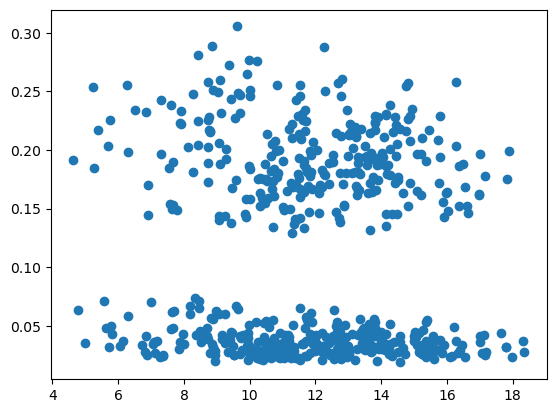

In [29]:
# DewPt, InDew
# InDew?

plt.scatter(df['DewPt'], df['P'])
plt.show()

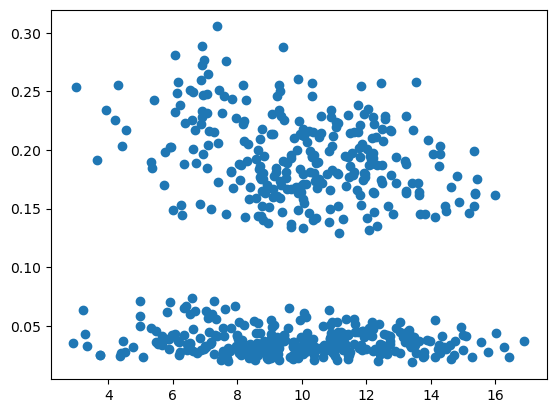

In [30]:
plt.scatter(df['InDew'], df['P'])
plt.show()

InDew is a little more... linear? Still not, but yeah.

In [31]:
df.drop('DewPt', axis=1, inplace=True)

In [32]:
df.corr()

/var/folders/f_/1f21rmxs29z6pyrpb6hklc900000gn/T/ipykernel_14674/1886530979.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,HiTemp,OutHum,WindSpeed,WindDir,WindRun,HiSpeed,HiDir,Bar,Rain,RainRate,...,InHum,InDew,InHeat,InEMC,InAirDensity,ET,WindSamp,WindTx,ISSRecept,P
HiTemp,1.000000,-0.546556,-0.072959,-0.080293,-0.072959,-0.059992,-0.093915,0.406500,-0.056715,0.088755,...,-0.266067,0.820992,0.757128,-0.306127,-0.607962,0.669603,-0.078951,-0.047285,-0.065824,-0.218734
OutHum,-0.546556,1.000000,-0.085572,0.083611,-0.085572,-0.114962,0.100027,-0.412800,0.167071,0.003912,...,0.450234,-0.037089,-0.404370,0.456236,0.216226,-0.846588,-0.038819,-0.010307,-0.040278,0.312250
WindSpeed,-0.072959,-0.085572,1.000000,0.441118,1.000000,0.951159,0.426869,-0.246004,0.101199,0.044997,...,-0.048263,-0.143883,-0.024170,-0.039862,-0.084230,0.135511,0.137576,0.122286,0.137647,-0.301590
WindDir,-0.080293,0.083611,0.441118,1.000000,0.441118,0.413413,0.967795,-0.212301,0.022181,0.000664,...,0.049177,-0.095549,-0.072622,0.054373,-0.023028,-0.026485,0.054619,-0.047679,0.093386,0.103260
WindRun,-0.072959,-0.085572,1.000000,0.441118,1.000000,0.951159,0.426869,-0.246004,0.101199,0.044997,...,-0.048263,-0.143883,-0.024170,-0.039862,-0.084230,0.135511,0.137576,0.122286,0.137647,-0.301590
HiSpeed,-0.059992,-0.114962,0.951159,0.413413,0.951159,1.000000,0.400385,-0.299006,0.101572,0.052740,...,-0.064620,-0.135506,-0.008617,-0.056456,-0.126166,0.174608,0.221964,0.157411,0.221077,-0.323696
HiDir,-0.093915,0.100027,0.426869,0.967795,0.426869,0.400385,1.000000,-0.185687,-0.001207,-0.010444,...,0.137669,-0.087159,-0.143603,0.142975,0.061299,-0.059856,0.060969,-0.043171,0.101582,0.129227
Bar,0.406500,-0.412800,-0.246004,-0.212301,-0.246004,-0.299006,-0.185687,1.000000,-0.156670,-0.042101,...,-0.203241,0.208622,0.290805,-0.213911,0.164717,0.278467,-0.221280,-0.037587,-0.217221,-0.197525
Rain,-0.056715,0.167071,0.101199,0.022181,0.101199,0.101572,-0.001207,-0.156670,1.000000,0.322973,...,-0.076132,-0.032252,0.052248,-0.071169,-0.125160,-0.098346,0.013038,0.129918,0.005762,-0.214164
RainRate,0.088755,0.003912,0.044997,0.000664,0.044997,0.052740,-0.010444,-0.042101,0.322973,1.000000,...,-0.081515,0.074484,0.142423,-0.083633,-0.152437,0.060302,0.034464,0.002408,0.030206,-0.097034


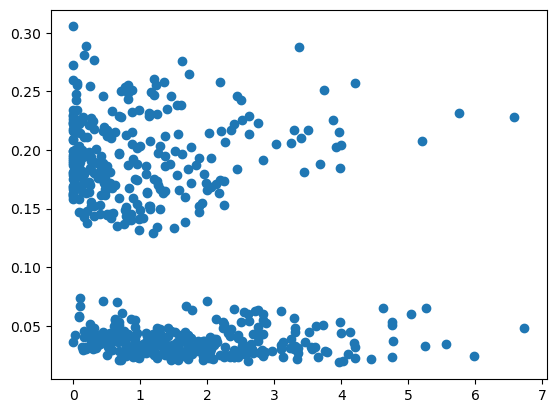

In [33]:
#WindSpeed, WindRun, HiSpeed
#HiSpeed

plt.scatter(df['WindSpeed'], df['P'])
plt.show()

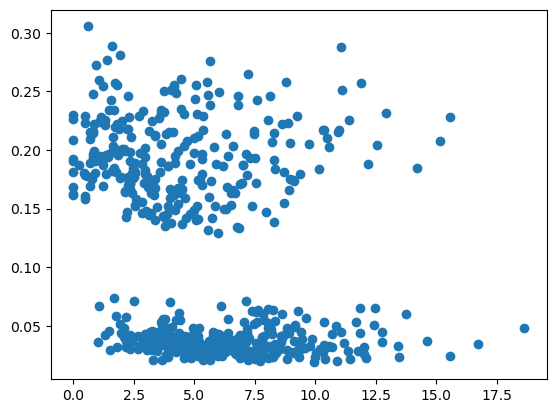

In [34]:
plt.scatter(df['HiSpeed'], df['P'])
plt.show()

The same problem. Maybe random forest/gradient boosting will help with that?

In [35]:
df.drop(['WindSpeed', 'WindRun'], axis=1, inplace=True)

In [36]:
df.corr()

/var/folders/f_/1f21rmxs29z6pyrpb6hklc900000gn/T/ipykernel_14674/1886530979.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,HiTemp,OutHum,WindDir,HiSpeed,HiDir,Bar,Rain,RainRate,SolarRad,SolarEnergy,...,InHum,InDew,InHeat,InEMC,InAirDensity,ET,WindSamp,WindTx,ISSRecept,P
HiTemp,1.000000,-0.546556,-0.080293,-0.059992,-0.093915,0.406500,-0.056715,0.088755,0.630541,0.630545,...,-0.266067,0.820992,0.757128,-0.306127,-0.607962,0.669603,-0.078951,-0.047285,-0.065824,-0.218734
OutHum,-0.546556,1.000000,0.083611,-0.114962,0.100027,-0.412800,0.167071,0.003912,-0.797773,-0.797776,...,0.450234,-0.037089,-0.404370,0.456236,0.216226,-0.846588,-0.038819,-0.010307,-0.040278,0.312250
WindDir,-0.080293,0.083611,1.000000,0.413413,0.967795,-0.212301,0.022181,0.000664,-0.072264,-0.072263,...,0.049177,-0.095549,-0.072622,0.054373,-0.023028,-0.026485,0.054619,-0.047679,0.093386,0.103260
HiSpeed,-0.059992,-0.114962,0.413413,1.000000,0.400385,-0.299006,0.101572,0.052740,0.076858,0.076857,...,-0.064620,-0.135506,-0.008617,-0.056456,-0.126166,0.174608,0.221964,0.157411,0.221077,-0.323696
HiDir,-0.093915,0.100027,0.967795,0.400385,1.000000,-0.185687,-0.001207,-0.010444,-0.106815,-0.106814,...,0.137669,-0.087159,-0.143603,0.142975,0.061299,-0.059856,0.060969,-0.043171,0.101582,0.129227
Bar,0.406500,-0.412800,-0.212301,-0.299006,-0.185687,1.000000,-0.156670,-0.042101,0.276711,0.276717,...,-0.203241,0.208622,0.290805,-0.213911,0.164717,0.278467,-0.221280,-0.037587,-0.217221,-0.197525
Rain,-0.056715,0.167071,0.022181,0.101572,-0.001207,-0.156670,1.000000,0.322973,-0.093085,-0.093086,...,-0.076132,-0.032252,0.052248,-0.071169,-0.125160,-0.098346,0.013038,0.129918,0.005762,-0.214164
RainRate,0.088755,0.003912,0.000664,0.052740,-0.010444,-0.042101,0.322973,1.000000,0.050608,0.050606,...,-0.081515,0.074484,0.142423,-0.083633,-0.152437,0.060302,0.034464,0.002408,0.030206,-0.097034
SolarRad,0.630541,-0.797773,-0.072264,0.076858,-0.106815,0.276711,-0.093085,0.050608,1.000000,1.000000,...,-0.481439,0.284968,0.613172,-0.498454,-0.492692,0.983963,0.143505,-0.044771,0.136390,-0.337730
SolarEnergy,0.630545,-0.797776,-0.072263,0.076857,-0.106814,0.276717,-0.093086,0.050606,1.000000,1.000000,...,-0.481434,0.284971,0.613170,-0.498450,-0.492688,0.983964,0.143502,-0.044770,0.136388,-0.337729


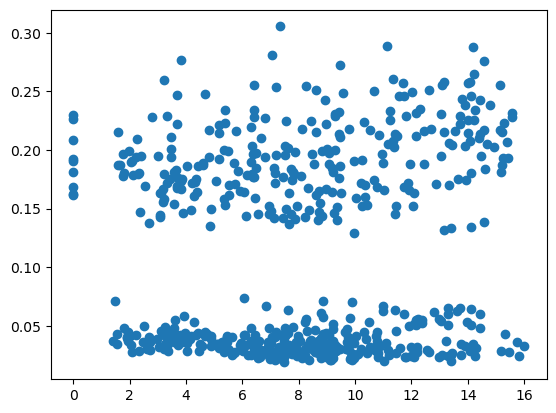

In [37]:
# WindDir, HiDir
# HiDir?

plt.scatter(df['WindDir'], df['P'])
plt.show()

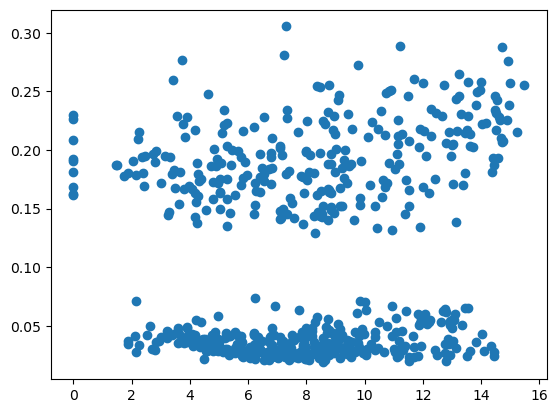

In [38]:
plt.scatter(df['HiDir'], df['P'])
plt.show()

In [39]:
df.drop('WindDir', axis=1, inplace=True)

In [40]:
df.corr()

/var/folders/f_/1f21rmxs29z6pyrpb6hklc900000gn/T/ipykernel_14674/1886530979.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,HiTemp,OutHum,HiSpeed,HiDir,Bar,Rain,RainRate,SolarRad,SolarEnergy,HiSolarRad,...,InHum,InDew,InHeat,InEMC,InAirDensity,ET,WindSamp,WindTx,ISSRecept,P
HiTemp,1.000000,-0.546556,-0.059992,-0.093915,0.406500,-0.056715,0.088755,0.630541,0.630545,0.624562,...,-0.266067,0.820992,0.757128,-0.306127,-0.607962,0.669603,-0.078951,-0.047285,-0.065824,-0.218734
OutHum,-0.546556,1.000000,-0.114962,0.100027,-0.412800,0.167071,0.003912,-0.797773,-0.797776,-0.821085,...,0.450234,-0.037089,-0.404370,0.456236,0.216226,-0.846588,-0.038819,-0.010307,-0.040278,0.312250
HiSpeed,-0.059992,-0.114962,1.000000,0.400385,-0.299006,0.101572,0.052740,0.076858,0.076857,0.091087,...,-0.064620,-0.135506,-0.008617,-0.056456,-0.126166,0.174608,0.221964,0.157411,0.221077,-0.323696
HiDir,-0.093915,0.100027,0.400385,1.000000,-0.185687,-0.001207,-0.010444,-0.106815,-0.106814,-0.112656,...,0.137669,-0.087159,-0.143603,0.142975,0.061299,-0.059856,0.060969,-0.043171,0.101582,0.129227
Bar,0.406500,-0.412800,-0.299006,-0.185687,1.000000,-0.156670,-0.042101,0.276711,0.276717,0.279168,...,-0.203241,0.208622,0.290805,-0.213911,0.164717,0.278467,-0.221280,-0.037587,-0.217221,-0.197525
Rain,-0.056715,0.167071,0.101572,-0.001207,-0.156670,1.000000,0.322973,-0.093085,-0.093086,-0.104644,...,-0.076132,-0.032252,0.052248,-0.071169,-0.125160,-0.098346,0.013038,0.129918,0.005762,-0.214164
RainRate,0.088755,0.003912,0.052740,-0.010444,-0.042101,0.322973,1.000000,0.050608,0.050606,0.041674,...,-0.081515,0.074484,0.142423,-0.083633,-0.152437,0.060302,0.034464,0.002408,0.030206,-0.097034
SolarRad,0.630541,-0.797773,0.076858,-0.106815,0.276711,-0.093085,0.050608,1.000000,1.000000,0.959793,...,-0.481439,0.284968,0.613172,-0.498454,-0.492692,0.983963,0.143505,-0.044771,0.136390,-0.337730
SolarEnergy,0.630545,-0.797776,0.076857,-0.106814,0.276717,-0.093086,0.050606,1.000000,1.000000,0.959792,...,-0.481434,0.284971,0.613170,-0.498450,-0.492688,0.983964,0.143502,-0.044770,0.136388,-0.337729
HiSolarRad,0.624562,-0.821085,0.091087,-0.112656,0.279168,-0.104644,0.041674,0.959793,0.959792,1.000000,...,-0.485869,0.263424,0.591279,-0.501918,-0.473969,0.951562,0.123596,-0.035799,0.117691,-0.327058


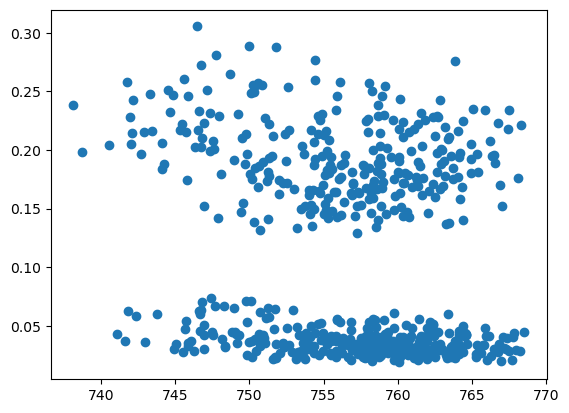

In [41]:
plt.scatter(df['Bar'], df['P'])
plt.show()

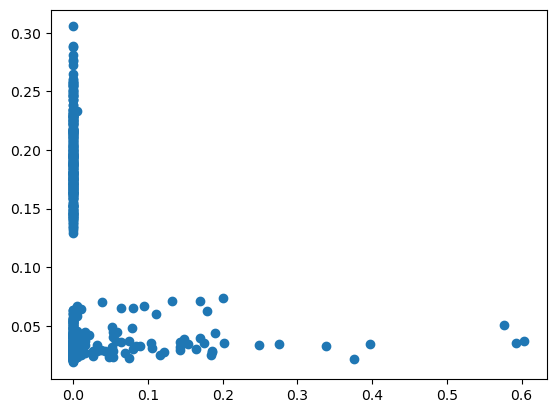

In [42]:
plt.scatter(df['Rain'], df['P'])
plt.show()

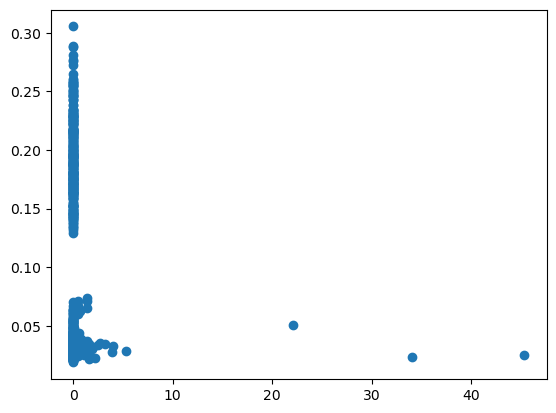

In [43]:
plt.scatter(df['RainRate'], df['P'])
plt.show()

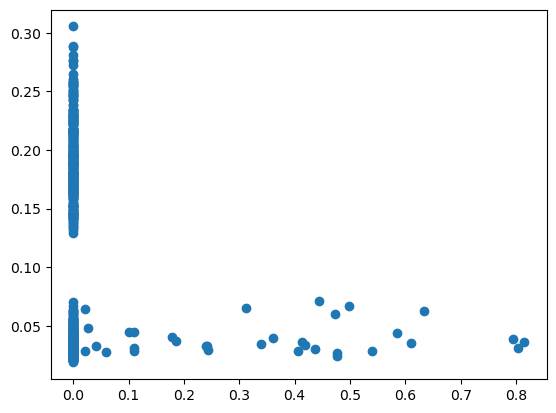

In [44]:
plt.scatter(df[df['RainRate'] < 1]['RainRate'], df[df['RainRate'] < 1]['P'])
plt.show()

In [45]:
df.corr()

/var/folders/f_/1f21rmxs29z6pyrpb6hklc900000gn/T/ipykernel_14674/1886530979.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,HiTemp,OutHum,HiSpeed,HiDir,Bar,Rain,RainRate,SolarRad,SolarEnergy,HiSolarRad,...,InHum,InDew,InHeat,InEMC,InAirDensity,ET,WindSamp,WindTx,ISSRecept,P
HiTemp,1.000000,-0.546556,-0.059992,-0.093915,0.406500,-0.056715,0.088755,0.630541,0.630545,0.624562,...,-0.266067,0.820992,0.757128,-0.306127,-0.607962,0.669603,-0.078951,-0.047285,-0.065824,-0.218734
OutHum,-0.546556,1.000000,-0.114962,0.100027,-0.412800,0.167071,0.003912,-0.797773,-0.797776,-0.821085,...,0.450234,-0.037089,-0.404370,0.456236,0.216226,-0.846588,-0.038819,-0.010307,-0.040278,0.312250
HiSpeed,-0.059992,-0.114962,1.000000,0.400385,-0.299006,0.101572,0.052740,0.076858,0.076857,0.091087,...,-0.064620,-0.135506,-0.008617,-0.056456,-0.126166,0.174608,0.221964,0.157411,0.221077,-0.323696
HiDir,-0.093915,0.100027,0.400385,1.000000,-0.185687,-0.001207,-0.010444,-0.106815,-0.106814,-0.112656,...,0.137669,-0.087159,-0.143603,0.142975,0.061299,-0.059856,0.060969,-0.043171,0.101582,0.129227
Bar,0.406500,-0.412800,-0.299006,-0.185687,1.000000,-0.156670,-0.042101,0.276711,0.276717,0.279168,...,-0.203241,0.208622,0.290805,-0.213911,0.164717,0.278467,-0.221280,-0.037587,-0.217221,-0.197525
Rain,-0.056715,0.167071,0.101572,-0.001207,-0.156670,1.000000,0.322973,-0.093085,-0.093086,-0.104644,...,-0.076132,-0.032252,0.052248,-0.071169,-0.125160,-0.098346,0.013038,0.129918,0.005762,-0.214164
RainRate,0.088755,0.003912,0.052740,-0.010444,-0.042101,0.322973,1.000000,0.050608,0.050606,0.041674,...,-0.081515,0.074484,0.142423,-0.083633,-0.152437,0.060302,0.034464,0.002408,0.030206,-0.097034
SolarRad,0.630541,-0.797773,0.076858,-0.106815,0.276711,-0.093085,0.050608,1.000000,1.000000,0.959793,...,-0.481439,0.284968,0.613172,-0.498454,-0.492692,0.983963,0.143505,-0.044771,0.136390,-0.337730
SolarEnergy,0.630545,-0.797776,0.076857,-0.106814,0.276717,-0.093086,0.050606,1.000000,1.000000,0.959792,...,-0.481434,0.284971,0.613170,-0.498450,-0.492688,0.983964,0.143502,-0.044770,0.136388,-0.337729
HiSolarRad,0.624562,-0.821085,0.091087,-0.112656,0.279168,-0.104644,0.041674,0.959793,0.959792,1.000000,...,-0.485869,0.263424,0.591279,-0.501918,-0.473969,0.951562,0.123596,-0.035799,0.117691,-0.327058


In [46]:
# SolarRad, SolarEnergy, HiSolarRad, ET
# ET?

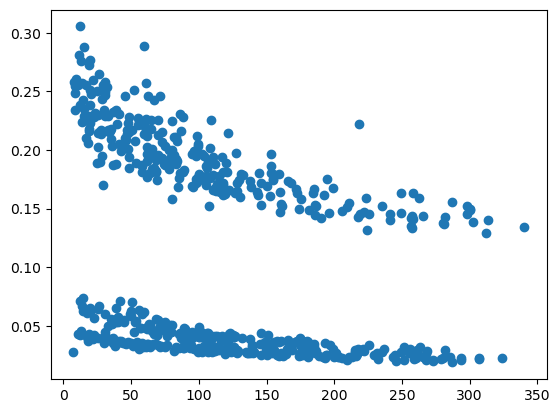

In [47]:
plt.scatter(df['SolarRad'], df['P'])
plt.show()

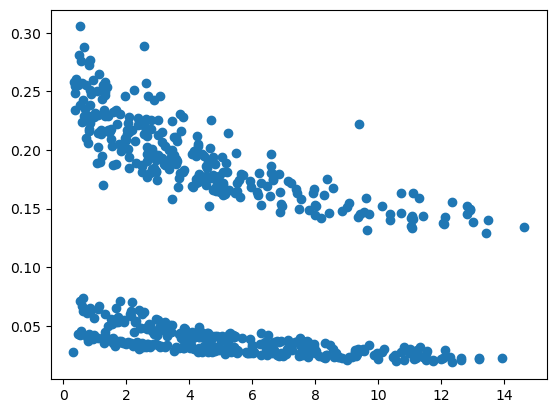

In [48]:
plt.scatter(df['SolarEnergy'], df['P'])
plt.show()

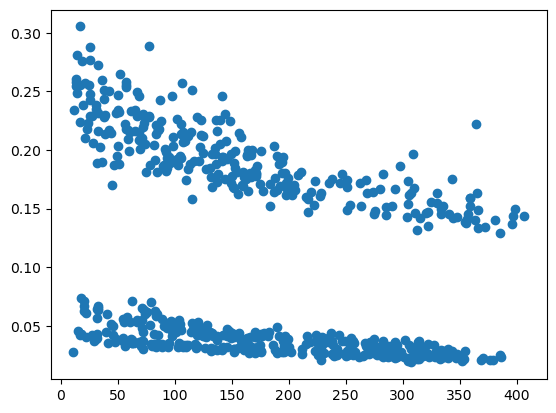

In [49]:
plt.scatter(df['HiSolarRad'], df['P'])
plt.show()

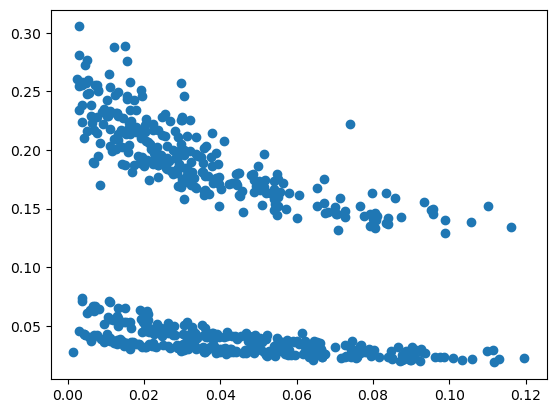

In [50]:
plt.scatter(df['ET'], df['P'])
plt.show()

The best predictor for now? Just go leave ET.

In [51]:
df.drop(['SolarRad', 'SolarEnergy', 'HiSolarRad'], axis=1, inplace=True)

In [52]:
df.corr()

/var/folders/f_/1f21rmxs29z6pyrpb6hklc900000gn/T/ipykernel_14674/1886530979.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,HiTemp,OutHum,HiSpeed,HiDir,Bar,Rain,RainRate,CoolD-D,InTemp,InHum,InDew,InHeat,InEMC,InAirDensity,ET,WindSamp,WindTx,ISSRecept,P
HiTemp,1.000000,-0.546556,-0.059992,-0.093915,0.406500,-0.056715,0.088755,0.790354,0.721387,-0.266067,0.820992,0.757128,-0.306127,-0.607962,0.669603,-0.078951,-0.047285,-0.065824,-0.218734
OutHum,-0.546556,1.000000,-0.114962,0.100027,-0.412800,0.167071,0.003912,-0.514253,-0.424522,0.450234,-0.037089,-0.404370,0.456236,0.216226,-0.846588,-0.038819,-0.010307,-0.040278,0.312250
HiSpeed,-0.059992,-0.114962,1.000000,0.400385,-0.299006,0.101572,0.052740,-0.061412,0.002022,-0.064620,-0.135506,-0.008617,-0.056456,-0.126166,0.174608,0.221964,0.157411,0.221077,-0.323696
HiDir,-0.093915,0.100027,0.400385,1.000000,-0.185687,-0.001207,-0.010444,-0.066924,-0.141815,0.137669,-0.087159,-0.143603,0.142975,0.061299,-0.059856,0.060969,-0.043171,0.101582,0.129227
Bar,0.406500,-0.412800,-0.299006,-0.185687,1.000000,-0.156670,-0.042101,0.188053,0.296233,-0.203241,0.208622,0.290805,-0.213911,0.164717,0.278467,-0.221280,-0.037587,-0.217221,-0.197525
Rain,-0.056715,0.167071,0.101572,-0.001207,-0.156670,1.000000,0.322973,-0.068860,0.057253,-0.076132,-0.032252,0.052248,-0.071169,-0.125160,-0.098346,0.013038,0.129918,0.005762,-0.214164
RainRate,0.088755,0.003912,0.052740,-0.010444,-0.042101,0.322973,1.000000,0.133031,0.130745,-0.081515,0.074484,0.142423,-0.083633,-0.152437,0.060302,0.034464,0.002408,0.030206,-0.097034
CoolD-D,0.790354,-0.514253,-0.061412,-0.066924,0.188053,-0.068860,0.133031,1.000000,0.586586,-0.247253,0.599592,0.627838,-0.278440,-0.551223,0.682809,0.016294,-0.066896,0.019932,-0.185227
InTemp,0.721387,-0.424522,0.002022,-0.141815,0.296233,0.057253,0.130745,0.586586,1.000000,-0.801735,0.487959,0.995655,-0.826728,-0.886940,0.619782,-0.131237,-0.033224,-0.124308,-0.314851
InHum,-0.266067,0.450234,-0.064620,0.137669,-0.203241,-0.076132,-0.081515,-0.247253,-0.801735,1.000000,0.112649,-0.752368,0.998659,0.664162,-0.484428,0.155428,-0.026091,0.153431,0.271576


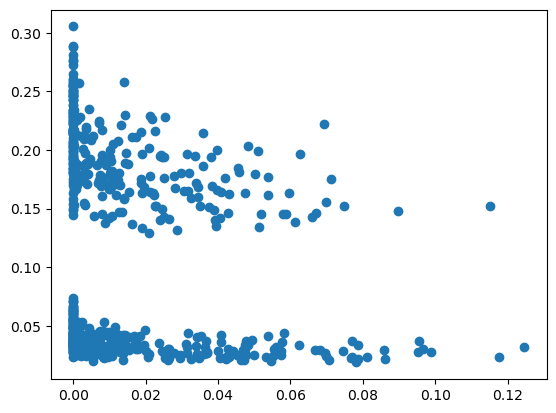

In [53]:
plt.scatter(df['CoolD-D'], df['P'])
plt.show()

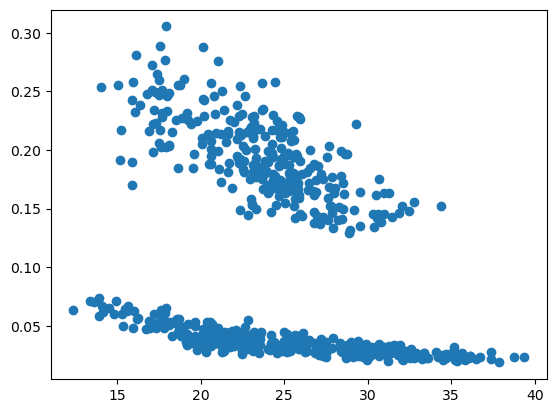

In [54]:
# InTemp, InHeat
# InTemp?

plt.scatter(df['InTemp'], df['P'])
plt.show()

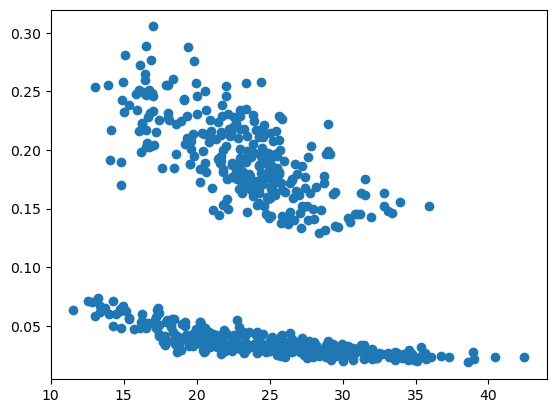

In [55]:
plt.scatter(df['InHeat'], df['P'])
plt.show()

In [56]:
df.drop('InHeat', inplace=True, axis=1)

In [57]:
df.corr()

/var/folders/f_/1f21rmxs29z6pyrpb6hklc900000gn/T/ipykernel_14674/1886530979.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,HiTemp,OutHum,HiSpeed,HiDir,Bar,Rain,RainRate,CoolD-D,InTemp,InHum,InDew,InEMC,InAirDensity,ET,WindSamp,WindTx,ISSRecept,P
HiTemp,1.000000,-0.546556,-0.059992,-0.093915,0.406500,-0.056715,0.088755,0.790354,0.721387,-0.266067,0.820992,-0.306127,-0.607962,0.669603,-0.078951,-0.047285,-0.065824,-0.218734
OutHum,-0.546556,1.000000,-0.114962,0.100027,-0.412800,0.167071,0.003912,-0.514253,-0.424522,0.450234,-0.037089,0.456236,0.216226,-0.846588,-0.038819,-0.010307,-0.040278,0.312250
HiSpeed,-0.059992,-0.114962,1.000000,0.400385,-0.299006,0.101572,0.052740,-0.061412,0.002022,-0.064620,-0.135506,-0.056456,-0.126166,0.174608,0.221964,0.157411,0.221077,-0.323696
HiDir,-0.093915,0.100027,0.400385,1.000000,-0.185687,-0.001207,-0.010444,-0.066924,-0.141815,0.137669,-0.087159,0.142975,0.061299,-0.059856,0.060969,-0.043171,0.101582,0.129227
Bar,0.406500,-0.412800,-0.299006,-0.185687,1.000000,-0.156670,-0.042101,0.188053,0.296233,-0.203241,0.208622,-0.213911,0.164717,0.278467,-0.221280,-0.037587,-0.217221,-0.197525
Rain,-0.056715,0.167071,0.101572,-0.001207,-0.156670,1.000000,0.322973,-0.068860,0.057253,-0.076132,-0.032252,-0.071169,-0.125160,-0.098346,0.013038,0.129918,0.005762,-0.214164
RainRate,0.088755,0.003912,0.052740,-0.010444,-0.042101,0.322973,1.000000,0.133031,0.130745,-0.081515,0.074484,-0.083633,-0.152437,0.060302,0.034464,0.002408,0.030206,-0.097034
CoolD-D,0.790354,-0.514253,-0.061412,-0.066924,0.188053,-0.068860,0.133031,1.000000,0.586586,-0.247253,0.599592,-0.278440,-0.551223,0.682809,0.016294,-0.066896,0.019932,-0.185227
InTemp,0.721387,-0.424522,0.002022,-0.141815,0.296233,0.057253,0.130745,0.586586,1.000000,-0.801735,0.487959,-0.826728,-0.886940,0.619782,-0.131237,-0.033224,-0.124308,-0.314851
InHum,-0.266067,0.450234,-0.064620,0.137669,-0.203241,-0.076132,-0.081515,-0.247253,-0.801735,1.000000,0.112649,0.998659,0.664162,-0.484428,0.155428,-0.026091,0.153431,0.271576


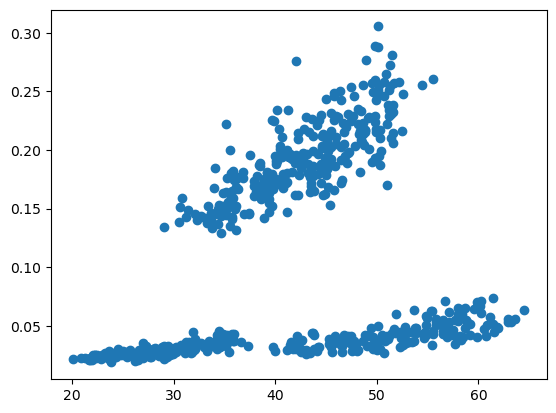

In [58]:
#InHum, InEMC
#InHum?

plt.scatter(df['InHum'], df['P'])
plt.show()

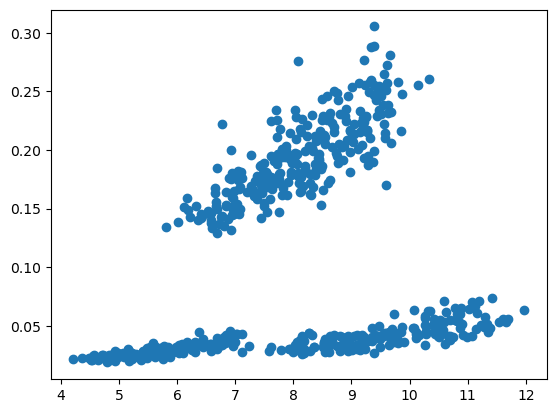

In [59]:
plt.scatter(df['InEMC'], df['P'])
plt.show()

In [60]:
df.drop('InEMC', inplace=True, axis=1)

In [61]:
df.corr()

/var/folders/f_/1f21rmxs29z6pyrpb6hklc900000gn/T/ipykernel_14674/1886530979.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,HiTemp,OutHum,HiSpeed,HiDir,Bar,Rain,RainRate,CoolD-D,InTemp,InHum,InDew,InAirDensity,ET,WindSamp,WindTx,ISSRecept,P
HiTemp,1.000000,-0.546556,-0.059992,-0.093915,0.406500,-0.056715,0.088755,0.790354,0.721387,-0.266067,0.820992,-0.607962,0.669603,-0.078951,-0.047285,-0.065824,-0.218734
OutHum,-0.546556,1.000000,-0.114962,0.100027,-0.412800,0.167071,0.003912,-0.514253,-0.424522,0.450234,-0.037089,0.216226,-0.846588,-0.038819,-0.010307,-0.040278,0.312250
HiSpeed,-0.059992,-0.114962,1.000000,0.400385,-0.299006,0.101572,0.052740,-0.061412,0.002022,-0.064620,-0.135506,-0.126166,0.174608,0.221964,0.157411,0.221077,-0.323696
HiDir,-0.093915,0.100027,0.400385,1.000000,-0.185687,-0.001207,-0.010444,-0.066924,-0.141815,0.137669,-0.087159,0.061299,-0.059856,0.060969,-0.043171,0.101582,0.129227
Bar,0.406500,-0.412800,-0.299006,-0.185687,1.000000,-0.156670,-0.042101,0.188053,0.296233,-0.203241,0.208622,0.164717,0.278467,-0.221280,-0.037587,-0.217221,-0.197525
Rain,-0.056715,0.167071,0.101572,-0.001207,-0.156670,1.000000,0.322973,-0.068860,0.057253,-0.076132,-0.032252,-0.125160,-0.098346,0.013038,0.129918,0.005762,-0.214164
RainRate,0.088755,0.003912,0.052740,-0.010444,-0.042101,0.322973,1.000000,0.133031,0.130745,-0.081515,0.074484,-0.152437,0.060302,0.034464,0.002408,0.030206,-0.097034
CoolD-D,0.790354,-0.514253,-0.061412,-0.066924,0.188053,-0.068860,0.133031,1.000000,0.586586,-0.247253,0.599592,-0.551223,0.682809,0.016294,-0.066896,0.019932,-0.185227
InTemp,0.721387,-0.424522,0.002022,-0.141815,0.296233,0.057253,0.130745,0.586586,1.000000,-0.801735,0.487959,-0.886940,0.619782,-0.131237,-0.033224,-0.124308,-0.314851
InHum,-0.266067,0.450234,-0.064620,0.137669,-0.203241,-0.076132,-0.081515,-0.247253,-0.801735,1.000000,0.112649,0.664162,-0.484428,0.155428,-0.026091,0.153431,0.271576


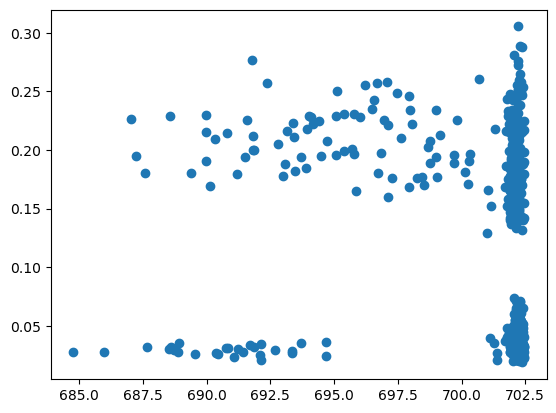

In [62]:
# WindSamp, ISSRecept
# WindSamp?

plt.scatter(df['WindSamp'], df['P'])
plt.show()

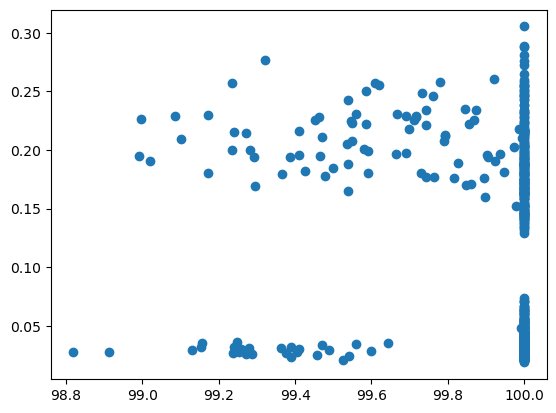

In [63]:
plt.scatter(df['ISSRecept'], df['P'])
plt.show()

In [64]:
df.drop('WindSamp', axis=1, inplace=True)

In [65]:
df.corr()

/var/folders/f_/1f21rmxs29z6pyrpb6hklc900000gn/T/ipykernel_14674/1886530979.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,HiTemp,OutHum,HiSpeed,HiDir,Bar,Rain,RainRate,CoolD-D,InTemp,InHum,InDew,InAirDensity,ET,WindTx,ISSRecept,P
HiTemp,1.000000,-0.546556,-0.059992,-0.093915,0.406500,-0.056715,0.088755,0.790354,0.721387,-0.266067,0.820992,-0.607962,0.669603,-0.047285,-0.065824,-0.218734
OutHum,-0.546556,1.000000,-0.114962,0.100027,-0.412800,0.167071,0.003912,-0.514253,-0.424522,0.450234,-0.037089,0.216226,-0.846588,-0.010307,-0.040278,0.312250
HiSpeed,-0.059992,-0.114962,1.000000,0.400385,-0.299006,0.101572,0.052740,-0.061412,0.002022,-0.064620,-0.135506,-0.126166,0.174608,0.157411,0.221077,-0.323696
HiDir,-0.093915,0.100027,0.400385,1.000000,-0.185687,-0.001207,-0.010444,-0.066924,-0.141815,0.137669,-0.087159,0.061299,-0.059856,-0.043171,0.101582,0.129227
Bar,0.406500,-0.412800,-0.299006,-0.185687,1.000000,-0.156670,-0.042101,0.188053,0.296233,-0.203241,0.208622,0.164717,0.278467,-0.037587,-0.217221,-0.197525
Rain,-0.056715,0.167071,0.101572,-0.001207,-0.156670,1.000000,0.322973,-0.068860,0.057253,-0.076132,-0.032252,-0.125160,-0.098346,0.129918,0.005762,-0.214164
RainRate,0.088755,0.003912,0.052740,-0.010444,-0.042101,0.322973,1.000000,0.133031,0.130745,-0.081515,0.074484,-0.152437,0.060302,0.002408,0.030206,-0.097034
CoolD-D,0.790354,-0.514253,-0.061412,-0.066924,0.188053,-0.068860,0.133031,1.000000,0.586586,-0.247253,0.599592,-0.551223,0.682809,-0.066896,0.019932,-0.185227
InTemp,0.721387,-0.424522,0.002022,-0.141815,0.296233,0.057253,0.130745,0.586586,1.000000,-0.801735,0.487959,-0.886940,0.619782,-0.033224,-0.124308,-0.314851
InHum,-0.266067,0.450234,-0.064620,0.137669,-0.203241,-0.076132,-0.081515,-0.247253,-0.801735,1.000000,0.112649,0.664162,-0.484428,-0.026091,0.153431,0.271576


In [66]:
df

,Site,Date,HiTemp,OutHum,HiSpeed,HiDir,Bar,Rain,RainRate,CoolD-D,InTemp,InHum,InDew,InAirDensity,ET,WindTx,ISSRecept,Substation,t_date,P
0,Elm Crescent,2014-06-10,20.495833,62.645833,7.208333,7.395833,759.716667,0.0,0.0,0.046333,35.216667,23.687500,11.075000,0.070546,0.103333,1.416667,100.0,Elm Crescent,2014-06-10,0.020756
1,Elm Crescent,2014-06-11,17.964583,64.187500,5.666667,8.645833,766.022917,0.0,0.0,0.026125,32.122917,21.958333,7.477083,0.072069,0.087500,1.250000,100.0,Elm Crescent,2014-06-11,0.020857
2,Elm Crescent,2014-06-12,19.429167,63.687500,3.645833,6.729167,767.737500,0.0,0.0,0.047042,34.506250,21.645833,9.302083,0.071579,0.089583,1.020833,100.0,Elm Crescent,2014-06-12,0.020573
3,Elm Crescent,2014-06-13,19.435417,68.250000,3.916667,6.812500,765.260417,0.0,0.0,0.042979,34.208333,22.770833,9.866667,0.071377,0.072708,1.291667,100.0,Elm Crescent,2014-06-13,0.023309
4,Elm Crescent,2014-06-14,16.625000,75.937500,7.479167,10.041667,765.456250,0.0,0.0,0.001083,31.427083,25.000000,8.970833,0.072085,0.047500,1.625000,100.0,Elm Crescent,2014-06-14,0.028188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,YMCA,2014-11-15,9.820833,94.687500,3.145833,12.041667,743.452083,0.0,0.0,0.000000,16.910417,52.500000,7.116667,0.073596,0.005000,1.250000,100.0,YMCA,2014-11-15,0.216568
597,YMCA,2014-11-16,9.210417,94.791667,0.833333,4.625000,743.270833,0.0,0.0,0.000000,16.797917,52.604167,7.045833,0.073612,0.005208,1.000000,100.0,YMCA,2014-11-16,0.247817
598,YMCA,2014-11-17,7.870833,94.166667,3.729167,8.729167,744.656250,0.0,0.0,0.000000,16.041667,51.562500,6.050000,0.073998,0.008958,1.125000,100.0,YMCA,2014-11-17,0.232847
599,YMCA,2014-11-18,9.187500,93.000000,0.875000,3.770833,751.316667,0.0,0.0,0.000000,17.141667,50.958333,6.885417,0.074338,0.009167,1.125000,100.0,YMCA,2014-11-18,0.221834


Summary:
Data have odd and maybe problematic behaviour of having many points with low target which makes two groups of points on scatter plot.

In [67]:
from sklearn.model_selection import train_test_split
y = df['P']
df_temp = df.drop(['P', 'Site', 'Substation', 't_date', 'Date'], axis=1)
X = df_temp
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123)

In [68]:
# Rain and RainRate seems problematic - but can be good weak feature. We are going to test also without them
df_temp = df.drop(['P', 'Site', 'Substation', 't_date', 'Date', 'Rain', 'RainRate'], axis=1)
X2 = df_temp
x2_train, x2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.5, random_state=123)

In [69]:
from sklearn.preprocessing import MinMaxScaler

In [70]:
# traditional MinMaxScaler
mms = MinMaxScaler()
mms.fit(x_train)
x_train = mms.transform(x_train)
x_test = mms.transform(x_test)

mms2 = MinMaxScaler()
mms.fit(x2_train)
x2_train = mms.transform(x2_train)
x2_test = mms.transform(x2_test)

In [71]:
from sklearn.linear_model import LinearRegression
# Don't think that linear model is good for that problem. Splitting data into 2 groups (characteristic of data) skewed line of predictor.

In [113]:
lr = LinearRegression()
lr2 = LinearRegression()

In [114]:
lr.fit(x_train, y_train)
lr2.fit(x2_train, y_train)

LinearRegression()

In [115]:
lr.score(x_test, y_test)

0.4854053234544179

In [116]:
lr.score(x_train, y_train)

0.5247878814484586

In [117]:
lr2.score(x2_test, y_test)

0.45977622591588085

In [118]:
lr2.score(x2_train, y_train)

0.49920974765553827

In [119]:
results_lr = {}
for index in range(len(lr.coef_)):
    results_lr[X.columns[index]] = lr.coef_[index]

In [120]:
print(results_lr)

{'HiTemp': 0.07812133418342664, 'OutHum': 0.01503426954043234, 'HiSpeed': -0.1705047559041608, 'HiDir': 0.11886322532245147, 'Bar': -1.2957545770758752, 'Rain': -0.13940292935323365, 'RainRate': 0.0218102338026912, 'CoolD-D': -0.011801684854620232, 'InTemp': 1.3039926632436964, 'InHum': -0.9628735365460961, 'InDew': 1.0570441665728947, 'InAirDensity': 3.031480811526728, 'ET': -0.0040302260845825385, 'WindTx': -0.07277307151482297, 'ISSRecept': -0.039142611254289604}


In [121]:
results_lr2 = {}
for index in range(len(lr2.coef_)):
    results_lr2[X.columns[index]] = lr2.coef_[index]

In [122]:
print(results_lr2)

{'HiTemp': -0.020066019904526597, 'OutHum': -0.04423392521529637, 'HiSpeed': -0.17530523212540833, 'HiDir': 0.1257749365800857, 'Bar': -1.2762249488991333, 'Rain': -0.0011896973861171007, 'RainRate': 1.245154677960248, 'CoolD-D': -0.997400130408689, 'InTemp': 1.1528208858205964, 'InHum': 3.004655021936426, 'InDew': -0.023190876955437555, 'InAirDensity': -0.07784890224617977, 'ET': -0.03577333723161501}


In [123]:
y_test

313    0.070949
43     0.021695
102    0.034562
352    0.218047
270    0.040715
         ...   
165    0.041369
328    0.218022
366    0.178103
38     0.023796
353    0.223643
Name: P, Length: 301, dtype: float64

In [124]:
from sklearn.ensemble import RandomForestRegressor

In [125]:
rfr = RandomForestRegressor(random_state=123)
rfr2 = RandomForestRegressor(random_state=123)

In [126]:
rfr.fit(x_train, y_train)
rfr2.fit(x2_train, y_train)

RandomForestRegressor(random_state=123)

In [127]:
rfr.score(x_test, y_test)

0.8853752925847387

In [128]:
rfr.score(x_train, y_train)

0.9825553571648254

In [129]:
rfr2.score(x2_test, y_test)

0.8863780727910936

In [130]:
rfr2.score(x2_train, y2_train)

0.983260120596701

In [131]:
y_test

313    0.070949
43     0.021695
102    0.034562
352    0.218047
270    0.040715
         ...   
165    0.041369
328    0.218022
366    0.178103
38     0.023796
353    0.223643
Name: P, Length: 301, dtype: float64

In [132]:
results_rfr = {}
for index in range(len(rfr.feature_importances_)):
    results_rfr[X.columns[index]] = rfr.feature_importances_[index]

In [133]:
results_rfr

{'HiTemp': 0.004254719762095415,
 'OutHum': 0.11389001929473029,
 'HiSpeed': 0.011770047277886603,
 'HiDir': 0.00879153109191535,
 'Bar': 0.010826029951688436,
 'Rain': 0.06970756136536044,
 'RainRate': 2.701109873687058e-06,
 'CoolD-D': 0.005546712579660885,
 'InTemp': 0.015172071157546301,
 'InHum': 0.5766008952070757,
 'InDew': 0.003242521818813625,
 'InAirDensity': 0.013902464756039963,
 'ET': 0.12941686641477598,
 'WindTx': 0.028641485383843396,
 'ISSRecept': 0.008234372828694018}

In [134]:
results_rfr2 = {}
for index in range(len(rfr2.feature_importances_)):
    results_rfr2[X.columns[index]] = rfr2.feature_importances_[index]

In [135]:
results_rfr2

{'HiTemp': 0.005639212577282668,
 'OutHum': 0.1184665401924868,
 'HiSpeed': 0.013441374692881187,
 'HiDir': 0.011563552633770102,
 'Bar': 0.008207272306540931,
 'Rain': 0.0027508340713658375,
 'RainRate': 0.012509973091360704,
 'CoolD-D': 0.6249334189037092,
 'InTemp': 0.003956432575820392,
 'InHum': 0.012209757913496145,
 'InDew': 0.13142208164474448,
 'InAirDensity': 0.04438197194590053,
 'ET': 0.01051757745064119}

In [136]:
from sklearn.ensemble import GradientBoostingRegressor

In [137]:
gbr = GradientBoostingRegressor(random_state=123)
gbr2 = GradientBoostingRegressor(random_state=123)

In [138]:
gbr.fit(x_train, y_train)
gbr2.fit(x2_train, y_train)

GradientBoostingRegressor(random_state=123)

In [139]:
gbr.score(x_test, y_test)

0.8601425328325455

In [140]:
gbr.score(x_train, y_train)

0.9841623727583262

In [141]:
gbr2.score(x2_test, y_test)

0.8463898592497149

In [142]:
gbr2.score(x2_train, y_train)

0.9822887374400475

In [143]:
results_gbr = {}
for index in range(len(gbr.feature_importances_)):
    results_gbr[X.columns[index]] = gbr.feature_importances_[index]

In [144]:
results_gbr

{'HiTemp': 0.0028836469209391528,
 'OutHum': 0.1288749665230446,
 'HiSpeed': 0.017700717624439966,
 'HiDir': 0.023371491046519866,
 'Bar': 0.02063280843882809,
 'Rain': 0.10438405117224805,
 'RainRate': 0.0,
 'CoolD-D': 0.003167123354820991,
 'InTemp': 0.01666956373278461,
 'InHum': 0.48650532587878853,
 'InDew': 0.0020273173511271407,
 'InAirDensity': 0.013305885310311436,
 'ET': 0.1251548168013861,
 'WindTx': 0.022560623677927483,
 'ISSRecept': 0.032761662166834016}

In [145]:
results_gbr2 = {}
for index in range(len(gbr2.feature_importances_)):
    results_gbr2[X.columns[index]] = gbr2.feature_importances_[index]

In [146]:
results_gbr2

{'HiTemp': 0.0038569990979220913,
 'OutHum': 0.14741067172630337,
 'HiSpeed': 0.02511727301980821,
 'HiDir': 0.030228559888637988,
 'Bar': 0.011820953418619558,
 'Rain': 0.001956277119493896,
 'RainRate': 0.0066371974505855256,
 'CoolD-D': 0.5886295784823072,
 'InTemp': 0.0010814569498877873,
 'InHum': 0.01044207469342054,
 'InDew': 0.11272754539846079,
 'InAirDensity': 0.042055918013401535,
 'ET': 0.01803549474115158}

Non-linear models have perfect results. It is shows they are overcome problematic character of data.

In [106]:
# let's tune n_estimators
gbr_final = GradientBoostingRegressor(n_estimators=500, random_state=123)

In [107]:
gbr_final.fit(x_train, y_train)

GradientBoostingRegressor(n_estimators=500, random_state=123)

In [108]:
gbr_final.score(x_test, y_test)

0.8663086007272958

In [147]:
gbr_final.score(x_train, y_train)

0.999842698254185

In [148]:
results_gbr = {}
for index in range(len(gbr2.feature_importances_)):
    results_gbr[X.columns[index]] = gbr.feature_importances_[index]

In [149]:
results_gbr

{'HiTemp': 0.0028836469209391528,
 'OutHum': 0.1288749665230446,
 'HiSpeed': 0.017700717624439966,
 'HiDir': 0.023371491046519866,
 'Bar': 0.02063280843882809,
 'Rain': 0.10438405117224805,
 'RainRate': 0.0,
 'CoolD-D': 0.003167123354820991,
 'InTemp': 0.01666956373278461,
 'InHum': 0.48650532587878853,
 'InDew': 0.0020273173511271407,
 'InAirDensity': 0.013305885310311436,
 'ET': 0.1251548168013861}

In [110]:
from sklearn.pipeline import Pipeline

In [111]:
pipeline = Pipeline([mms, gbr_final])

In [112]:
import pickle

with open('model.pkl', 'wb') as fp:
    pickle.dump(pipeline, fp)

Model is a little over-fitted in train data. Maybe there are no necessary to use that many variables.

It's not surprise that GradientBoosting is the best model for this problem. This model is the best for handling non-linear relations. The most important features are InHum and OutHum which are variables which shows humidity of air.

Let's try drop every variable with 0.7 <= corr. We know character of data - so we just chose variable with highest corr with target.

In [150]:
df.corr()

/var/folders/f_/1f21rmxs29z6pyrpb6hklc900000gn/T/ipykernel_14674/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,HiTemp,OutHum,HiSpeed,HiDir,Bar,Rain,RainRate,CoolD-D,InTemp,InHum,InDew,InAirDensity,ET,WindTx,ISSRecept,P
HiTemp,1.000000,-0.546556,-0.059992,-0.093915,0.406500,-0.056715,0.088755,0.790354,0.721387,-0.266067,0.820992,-0.607962,0.669603,-0.047285,-0.065824,-0.218734
OutHum,-0.546556,1.000000,-0.114962,0.100027,-0.412800,0.167071,0.003912,-0.514253,-0.424522,0.450234,-0.037089,0.216226,-0.846588,-0.010307,-0.040278,0.312250
HiSpeed,-0.059992,-0.114962,1.000000,0.400385,-0.299006,0.101572,0.052740,-0.061412,0.002022,-0.064620,-0.135506,-0.126166,0.174608,0.157411,0.221077,-0.323696
HiDir,-0.093915,0.100027,0.400385,1.000000,-0.185687,-0.001207,-0.010444,-0.066924,-0.141815,0.137669,-0.087159,0.061299,-0.059856,-0.043171,0.101582,0.129227
Bar,0.406500,-0.412800,-0.299006,-0.185687,1.000000,-0.156670,-0.042101,0.188053,0.296233,-0.203241,0.208622,0.164717,0.278467,-0.037587,-0.217221,-0.197525
Rain,-0.056715,0.167071,0.101572,-0.001207,-0.156670,1.000000,0.322973,-0.068860,0.057253,-0.076132,-0.032252,-0.125160,-0.098346,0.129918,0.005762,-0.214164
RainRate,0.088755,0.003912,0.052740,-0.010444,-0.042101,0.322973,1.000000,0.133031,0.130745,-0.081515,0.074484,-0.152437,0.060302,0.002408,0.030206,-0.097034
CoolD-D,0.790354,-0.514253,-0.061412,-0.066924,0.188053,-0.068860,0.133031,1.000000,0.586586,-0.247253,0.599592,-0.551223,0.682809,-0.066896,0.019932,-0.185227
InTemp,0.721387,-0.424522,0.002022,-0.141815,0.296233,0.057253,0.130745,0.586586,1.000000,-0.801735,0.487959,-0.886940,0.619782,-0.033224,-0.124308,-0.314851
InHum,-0.266067,0.450234,-0.064620,0.137669,-0.203241,-0.076132,-0.081515,-0.247253,-0.801735,1.000000,0.112649,0.664162,-0.484428,-0.026091,0.153431,0.271576


In [151]:
# HiTemp, CoolD-D, InTemp, InDew
# InTemp the best corr with target

df.drop(['HiTemp', 'CoolD-D', 'InDew'], inplace=True, axis=1)

In [152]:
df.corr()

/var/folders/f_/1f21rmxs29z6pyrpb6hklc900000gn/T/ipykernel_14674/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,OutHum,HiSpeed,HiDir,Bar,Rain,RainRate,InTemp,InHum,InAirDensity,ET,WindTx,ISSRecept,P
OutHum,1.000000,-0.114962,0.100027,-0.412800,0.167071,0.003912,-0.424522,0.450234,0.216226,-0.846588,-0.010307,-0.040278,0.312250
HiSpeed,-0.114962,1.000000,0.400385,-0.299006,0.101572,0.052740,0.002022,-0.064620,-0.126166,0.174608,0.157411,0.221077,-0.323696
HiDir,0.100027,0.400385,1.000000,-0.185687,-0.001207,-0.010444,-0.141815,0.137669,0.061299,-0.059856,-0.043171,0.101582,0.129227
Bar,-0.412800,-0.299006,-0.185687,1.000000,-0.156670,-0.042101,0.296233,-0.203241,0.164717,0.278467,-0.037587,-0.217221,-0.197525
Rain,0.167071,0.101572,-0.001207,-0.156670,1.000000,0.322973,0.057253,-0.076132,-0.125160,-0.098346,0.129918,0.005762,-0.214164
RainRate,0.003912,0.052740,-0.010444,-0.042101,0.322973,1.000000,0.130745,-0.081515,-0.152437,0.060302,0.002408,0.030206,-0.097034
InTemp,-0.424522,0.002022,-0.141815,0.296233,0.057253,0.130745,1.000000,-0.801735,-0.886940,0.619782,-0.033224,-0.124308,-0.314851
InHum,0.450234,-0.064620,0.137669,-0.203241,-0.076132,-0.081515,-0.801735,1.000000,0.664162,-0.484428,-0.026091,0.153431,0.271576
InAirDensity,0.216226,-0.126166,0.061299,0.164717,-0.125160,-0.152437,-0.886940,0.664162,1.000000,-0.499701,0.022001,0.021120,0.213791
ET,-0.846588,0.174608,-0.059856,0.278467,-0.098346,0.060302,0.619782,-0.484428,-0.499701,1.000000,-0.031640,0.135099,-0.370021


In [153]:
# OutHum, ET
# OutHum has worse corr, but we know that OutHum is better predictor on GradientBoosting

df.drop('ET', inplace=True, axis=1)

In [154]:
df.corr()

/var/folders/f_/1f21rmxs29z6pyrpb6hklc900000gn/T/ipykernel_14674/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,OutHum,HiSpeed,HiDir,Bar,Rain,RainRate,InTemp,InHum,InAirDensity,WindTx,ISSRecept,P
OutHum,1.000000,-0.114962,0.100027,-0.412800,0.167071,0.003912,-0.424522,0.450234,0.216226,-0.010307,-0.040278,0.312250
HiSpeed,-0.114962,1.000000,0.400385,-0.299006,0.101572,0.052740,0.002022,-0.064620,-0.126166,0.157411,0.221077,-0.323696
HiDir,0.100027,0.400385,1.000000,-0.185687,-0.001207,-0.010444,-0.141815,0.137669,0.061299,-0.043171,0.101582,0.129227
Bar,-0.412800,-0.299006,-0.185687,1.000000,-0.156670,-0.042101,0.296233,-0.203241,0.164717,-0.037587,-0.217221,-0.197525
Rain,0.167071,0.101572,-0.001207,-0.156670,1.000000,0.322973,0.057253,-0.076132,-0.125160,0.129918,0.005762,-0.214164
RainRate,0.003912,0.052740,-0.010444,-0.042101,0.322973,1.000000,0.130745,-0.081515,-0.152437,0.002408,0.030206,-0.097034
InTemp,-0.424522,0.002022,-0.141815,0.296233,0.057253,0.130745,1.000000,-0.801735,-0.886940,-0.033224,-0.124308,-0.314851
InHum,0.450234,-0.064620,0.137669,-0.203241,-0.076132,-0.081515,-0.801735,1.000000,0.664162,-0.026091,0.153431,0.271576
InAirDensity,0.216226,-0.126166,0.061299,0.164717,-0.125160,-0.152437,-0.886940,0.664162,1.000000,0.022001,0.021120,0.213791
WindTx,-0.010307,0.157411,-0.043171,-0.037587,0.129918,0.002408,-0.033224,-0.026091,0.022001,1.000000,0.173693,-0.173395


In [155]:
# InTemp, InHum, InAirDensity
# Leave InHum

df.drop(['InHum', 'InTemp'], axis=1, inplace=True)

In [156]:
df.corr()

/var/folders/f_/1f21rmxs29z6pyrpb6hklc900000gn/T/ipykernel_14674/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,OutHum,HiSpeed,HiDir,Bar,Rain,RainRate,InAirDensity,WindTx,ISSRecept,P
OutHum,1.000000,-0.114962,0.100027,-0.412800,0.167071,0.003912,0.216226,-0.010307,-0.040278,0.312250
HiSpeed,-0.114962,1.000000,0.400385,-0.299006,0.101572,0.052740,-0.126166,0.157411,0.221077,-0.323696
HiDir,0.100027,0.400385,1.000000,-0.185687,-0.001207,-0.010444,0.061299,-0.043171,0.101582,0.129227
Bar,-0.412800,-0.299006,-0.185687,1.000000,-0.156670,-0.042101,0.164717,-0.037587,-0.217221,-0.197525
Rain,0.167071,0.101572,-0.001207,-0.156670,1.000000,0.322973,-0.125160,0.129918,0.005762,-0.214164
RainRate,0.003912,0.052740,-0.010444,-0.042101,0.322973,1.000000,-0.152437,0.002408,0.030206,-0.097034
InAirDensity,0.216226,-0.126166,0.061299,0.164717,-0.125160,-0.152437,1.000000,0.022001,0.021120,0.213791
WindTx,-0.010307,0.157411,-0.043171,-0.037587,0.129918,0.002408,0.022001,1.000000,0.173693,-0.173395
ISSRecept,-0.040278,0.221077,0.101582,-0.217221,0.005762,0.030206,0.021120,0.173693,1.000000,-0.166223
P,0.312250,-0.323696,0.129227,-0.197525,-0.214164,-0.097034,0.213791,-0.173395,-0.166223,1.000000


Try train on that.

In [159]:
from sklearn.model_selection import train_test_split
y = df['P']
df_temp = df.drop(['P', 'Site', 'Substation', 't_date', 'Date'], axis=1)
X = df_temp
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123)

In [160]:
from sklearn.preprocessing import MinMaxScaler

In [161]:
mms = MinMaxScaler()
mms.fit(x_train)
x_train = mms.transform(x_train)
x_test = mms.transform(x_test)

In [162]:
gbr = GradientBoostingRegressor(random_state=123)

In [163]:
gbr.fit(x_train, y_train)

GradientBoostingRegressor(random_state=123)

In [164]:
gbr.score(x_test, y_test)

0.5790393118707683

In [165]:
gbr.score(x_train, y_train)

0.9134002537963105

Big over-fit

In [172]:
gbr = GradientBoostingRegressor(n_estimators=300, random_state=123)

In [173]:
gbr.fit(x_train, y_train)
gbr.score(x_test, y_test)

0.5505814343483643

Dropped too much - better stay in earlier data.